<a href="https://colab.research.google.com/github/Anuj-0911/ML-Models/blob/main/Stock_market_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# description : This program uses an Artificial recurrent neural network called Long short term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.)
#               using past 60 days stock price.

In [4]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-03-30')
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2021-03-24,122.900002,120.070000,122.820000,120.089996,88530500.0,120.089996
2021-03-25,121.660004,119.000000,119.540001,120.589996,98844700.0,120.589996
2021-03-26,121.480003,118.919998,120.349998,121.209999,93958900.0,121.209999


In [6]:
# Get the number of rows and columns in the dataset
df.shape

(2325, 6)

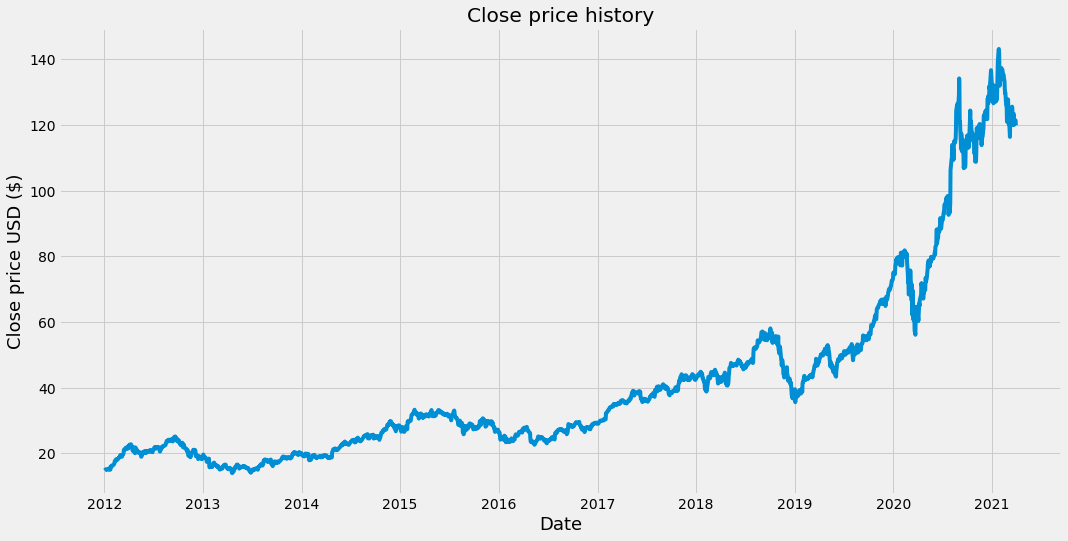

In [7]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.show()

In [8]:
# Create a new dataframe with only the close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model
training_data_len = math.ceil( len(dataset) * .75 ) 

training_data_len

1744

In [9]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.83012476],
       [0.83151782],
       [0.81998644]])

In [11]:
# Create the training dataset 
# Create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])



In [12]:
#Convert the x_train and y_train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [14]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(1684, 60, 1)

In [15]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [18]:
# Train the Model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1684/1684 [==============================] - 41s 23ms/step - loss: 7.7691e-04


In [20]:
# Create the testing dataset
# Create a new array containing scaled values from index 1684 to 2325
test_data =  scaled_data[training_data_len-60: , :]
# Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])



In [21]:
# Convert the data to a numpy array
x_test =  np.array(x_test)

In [22]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [23]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [24]:
# Get the root mean square error (RMSE)
rmse = np.sqrt( np.mean(predictions-y_test)**2 )
rmse

7.559347464582801

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


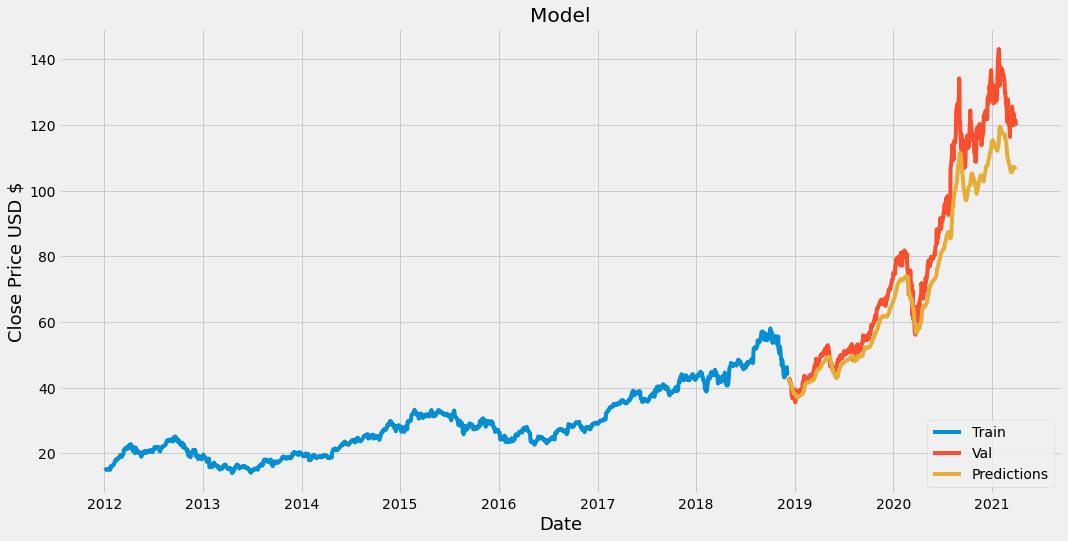

In [25]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [26]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-12-07,42.122501,42.967773
2018-12-10,42.400002,42.749863
2018-12-11,42.157501,42.468811
2018-12-12,42.275002,42.156475
2018-12-13,42.737499,41.866100
...,...,...
2021-03-24,120.089996,107.193405
2021-03-25,120.589996,107.006989
2021-03-26,121.209999,106.770760


In [28]:
# Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-03-30')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 day closing price values and dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scale = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the last 60 days
X_test.append(last_60_days_scale)
# Convert the X_test to numpy array
X_test = np.array(X_test)
# Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[106.24124]]


In [29]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-03-31', end='2021-03-31')
print(apple_quote2['Close'])

Date
2021-03-31    122.150002
Name: Close, dtype: float64
